In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. PWR

## 1.0 Reactor Data

### PWR - CLASS

#### Reactor
    - 17x17 infinite assembly
    - Heavy mass: 72 tons
    - Thermal power: 3 GWth
    - Loading factor: 75%
    - Irradiation time: 3 years that correspond to a burn-up closed to 34 GWd/t
#### FLM
    - Neural network prediction of the k$_{inf}$
    - k$_{threshold}$ is 1.034


### PWR - Tr_Evol

    - Thermal_power_(GW) : 3.0
    - Electrical_power_(GW) : 1.0
    - Load_factor : 0.9
    - Core_mass_(tHM) : 72.0
    - Burn_up_(GWd/tHM) : 41

### PWR - ANICCA

    - Fuel Heavy Mass: 22.2908 t
    - 38.156 GWd/t
    - Load Factor : 90%
    - Thermal Power : 3 GWth
    
### PWR - Cyclus

    - Heavy mass: 72 tons
    - Thermal power: 2.7 GWth
    - Burnup at the end of irradiation: 41.09 GWd/t
    - Loading factor: 100%

    - FLM = Baker and Ross (Ref is 4.5% Pu9)


### Reactor Calculation Data

In [2]:
PWR_CLASS_CT = 3

PWR_ANICCA_CT = 3 # TO ASK !!! We don't have irradiated mass

PWR_TrEvol = 3 # TO CALCULATE FROM DATA

## 1.1 Loading Data files and Variable declaration
### NICO / CLASS

In [3]:
M_CLASS_FLM = np.loadtxt('NICO/PWR_MOX_FLM.dat')
M_CLASS_FF = np.loadtxt('NICO/PWR_MOX_FF.dat')

M_CLASS_FLM_BOC_FPu = M_CLASS_FLM[:,5]/(M_CLASS_FLM[:,5]+M_CLASS_FLM[:,1])
M_CLASS_FLM_EOC_FPu = M_CLASS_FLM[:,6]/(M_CLASS_FLM[:,5]+M_CLASS_FLM[:,1])

M_CLASS_FF_BOC_FPu = M_CLASS_FF[:,6]/(M_CLASS_FF[:,5]+M_CLASS_FF[:,1])
M_CLASS_FF_EOC_FPu = M_CLASS_FF[:,6]/(M_CLASS_FF[:,5]+M_CLASS_FF[:,1])

### YVAN / ANICCA

In [4]:
M_ANICCA_FLM_BOC = np.loadtxt('YVAN/PWR_MOX_FLM_BOC.dat')
M_ANICCA_FLM_EOC = np.loadtxt('YVAN/PWR_MOX_FLM_EOC.dat')
M_ANICCA_FF_BOC = np.loadtxt('YVAN/PWR_MOX_FF_BOC.dat')
M_ANICCA_FF_EOC = np.loadtxt('YVAN/PWR_MOX_FF_EOC.dat')

M_ANICCA_FLM_BOC_FPu = M_ANICCA_FLM_BOC[:,2]
M_ANICCA_FLM_EOC_FPu = M_ANICCA_FLM_EOC[:,2]

M_ANICCA_FF_BOC_FPu = M_ANICCA_FF_BOC[:,2]
M_ANICCA_FF_EOC_FPu = M_ANICCA_FF_EOC[:,2]

### ARIS / TrEvol

In [5]:
M_TrEvol = np.loadtxt('CIEMAT/MOX_raw.txt')

M_TrEvol_FLM_BOC_FPu = M_TrEvol[:,23] / (M_TrEvol[:,23] + M_TrEvol[:,21])
M_TrEvol_FLM_EOC_FPu = M_TrEvol[:,33] / (M_TrEvol[:,33] + M_TrEvol[:,31])

M_TrEvol_FF_BOC_FPu = M_TrEvol[:,3] / (M_TrEvol[:,3] + M_TrEvol[:,1])
M_TrEvol_FF_EOC_FPu = M_TrEvol[:,13] / (M_TrEvol[:,13] + M_TrEvol[:,11])

### BAM / CYCLUS

In [24]:
M_Cyclus_FLM = np.loadtxt('BAM/eq.csv', delimiter=',')
M_Cyclus_FF = np.loadtxt('BAM/fix.csv', delimiter=',')

M_Cyclus_FLM_BOC_FPu = M_Cyclus_FLM[:,13]
M_Cyclus_FLM_EOC_FPu = M_Cyclus_FLM[:,14]

M_Cyclus_FF_BOC_FPu = M_Cyclus_FF[:,13]
M_Cyclus_FF_EOC_FPu = M_Cyclus_FF[:,14]

## 1.2 Plotting Pu for FLM @ BOC and EOC

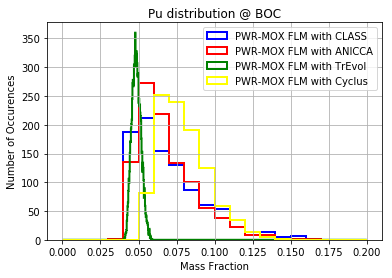

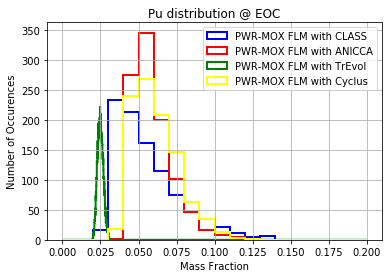

In [27]:
plt.figure(1)
plt.grid(True)
plt.title('Pu distribution @ BOC')
plt.xlabel('Mass Fraction')
plt.ylabel('Number of Occurences')
plt.hist(M_CLASS_FLM_BOC_FPu,bins=20,range=(0,0.20),histtype='step',lw=2,color='blue',label='PWR-MOX FLM with CLASS')
plt.hist(M_ANICCA_FLM_BOC_FPu,bins=20,range=(0,0.20),histtype='step',lw=2,color='red',label='PWR-MOX FLM with ANICCA')
plt.hist(M_TrEvol_FLM_BOC_FPu,bins=800,range=(0,0.20),histtype='step',lw=2,color='green',label='PWR-MOX FLM with TrEvol')
plt.hist(M_Cyclus_FLM_BOC_FPu,bins=20,range=(0,0.20),histtype='step',lw=2,color='yellow',label='PWR-MOX FLM with Cyclus')

plt.legend(loc='upper right')

plt.figure(2)
plt.grid(True)
plt.title('Pu distribution @ EOC')
plt.xlabel('Mass Fraction')
plt.ylabel('Number of Occurences')
plt.hist(M_CLASS_FLM_EOC_FPu,bins=20,range=(0,0.20),histtype='step',lw=2,color='blue',label='PWR-MOX FLM with CLASS')
plt.hist(M_ANICCA_FLM_EOC_FPu,bins=20,range=(0,0.20),histtype='step',lw=2,color='red',label='PWR-MOX FLM with ANICCA')
plt.hist(M_TrEvol_FLM_EOC_FPu,bins=2000,range=(0,0.20),histtype='step',lw=2,color='green',label='PWR-MOX FLM with TrEvol')
plt.hist(M_Cyclus_FLM_EOC_FPu,bins=20,range=(0,0.20),histtype='step',lw=2,color='yellow',label='PWR-MOX FLM with Cyclus')


plt.legend(loc='upper right')

=> <span style="color:red"> Why ANICCA has so small Pu consumption....?? </span>

=> <span style="color:red"> Why TrEvol is so focused around 5% ? </span>

## 1.3 Mean value estimators

In [7]:
print("Pu BOC CLASS FLM = ",np.mean(M_CLASS_FLM_BOC_FPu))
print("Pu EOC CLASS FLM = ",np.mean(M_CLASS_FLM_EOC_FPu))
print("Pu BOC CLASS FF = ",np.mean(M_CLASS_FF_BOC_FPu))
print("Pu EOC CLASS FF = ",np.mean(M_CLASS_FF_EOC_FPu))

print()

print("Pu BOC ANICCA FLM = ",np.mean(M_ANICCA_FLM_BOC_FPu))
print("Pu EOC ANICCA FLM = ",np.mean(M_ANICCA_FLM_EOC_FPu))
print("Pu BOC ANICCA FF = ",np.mean(M_ANICCA_FF_BOC_FPu))
print("Pu EOC ANICCA FF = ",np.mean(M_ANICCA_FF_EOC_FPu))

print()

print("Pu BOC TrEvol FLM = ",np.mean(M_TrEvol_FLM_BOC_FPu))
print("Pu EOC TrEvol FLM = ",np.mean(M_TrEvol_FLM_EOC_FPu))
print("Pu BOC TrEvol FF = ",np.mean(M_TrEvol_FF_BOC_FPu))
print("Pu EOC TrEvol FF = ",np.mean(M_TrEvol_FF_EOC_FPu))


Pu BOC CLASS FLM =  0.07049648239165257
Pu EOC CLASS FLM =  0.05595336212372836
Pu BOC CLASS FF =  0.055125920302501456
Pu EOC CLASS FF =  0.055125920302501456

Pu BOC ANICCA FLM =  0.0685931
Pu EOC ANICCA FLM =  0.059098700000000004
Pu BOC ANICCA FF =  0.0699621
Pu EOC ANICCA FF =  0.0593405

Pu BOC TrEvol FLM =  0.048649442486544105
Pu EOC TrEvol FLM =  0.024966759008538467
Pu BOC TrEvol FF =  0.04833068119853844
Pu EOC TrEvol FF =  0.024761294109127738


<span style="color:red"> WTF?? ANICCA EOC Pu fraction is higher than BOC ??</span>

## 1.4 Plotting estimator 1

Estimator 1 is calculated from the Pu fraction @ B.O.C. for each run *i*: 

$F(Pu_i) = \frac{Pu_i^{BOC}}{M_{HN}}$

With $M_{HN}$ the initial heavy mass. The estimator 1 is then calculated as : 

$\delta F(Pu_i) = \frac{F_{FLM}(Pu_i) - F_{FF}(Pu_i)}{F_{FF}(Pu_i)}$

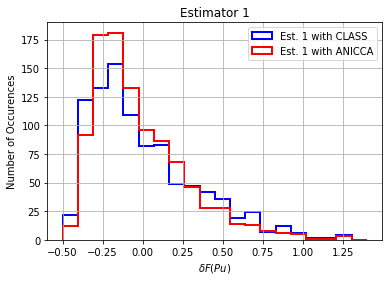

In [8]:
FPu_FLM_CLASS = M_CLASS_FLM[:,5]/(M_CLASS_FLM[:,5]+M_CLASS_FLM[:,1])
FPu_FF_CLASS = M_CLASS_FF[:,5]/(M_CLASS_FF[:,5]+M_CLASS_FF[:,1])

est_1_CLASS = (FPu_FLM_CLASS - FPu_FF_CLASS)/(FPu_FF_CLASS)

FPu_FLM_ANICCA = M_ANICCA_FLM_BOC[:,2]
FPu_FF_ANICCA = M_ANICCA_FF_BOC[:,2]

est_1_ANICCA = (FPu_FLM_ANICCA - FPu_FF_ANICCA)/(FPu_FF_ANICCA)



plt.figure(2)
plt.grid(True)
plt.title('Estimator 1')
plt.xlabel('$\delta F(Pu)$')
plt.ylabel('Number of Occurences')
plt.hist(est_1_CLASS,bins=20,range=(-0.5,1.4),histtype='step',lw=2,color='blue',label='Est. 1 with CLASS')
plt.hist(est_1_ANICCA,bins=20,range=(-0.5,1.4),histtype='step',lw=2,color='red',label='Est. 1 with ANICCA')
plt.legend(loc='upper right')

## 1.5 Plotting Estimator 2

The second estimator is related to the relative slope of the reactor evolution. Let's define :

$\frac{\Delta M}{M}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{M^{BOC}(Pu_i)}$

The estimateur 2 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{M}(Pu_i) = \frac{\frac{\Delta M}{M}(Pu_i)_{FLM} - \frac{\Delta M}{M}(Pu_i)_{FF}}{\frac{\Delta M}{M}(Pu_i)_{FF}}$

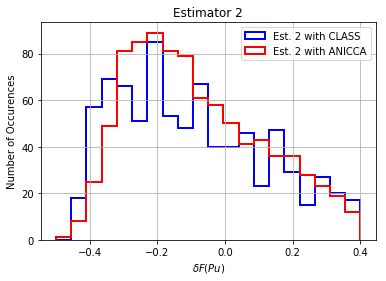

In [9]:
MPu_FLM_CLASS = (M_CLASS_FLM[:,5] - M_CLASS_FLM[:,6])/(M_CLASS_FLM[:,5])
MPu_FF_CLASS = (M_CLASS_FF[:,5] - M_CLASS_FF[:,6])/(M_CLASS_FF[:,5])

est_2_CLASS = (MPu_FLM_CLASS - MPu_FF_CLASS)/(MPu_FF_CLASS)

MPu_FLM_ANICCA = (M_ANICCA_FLM_BOC[:,2] - M_ANICCA_FLM_EOC[:,2])/M_ANICCA_FLM_BOC[:,2]
MPu_FF_ANICCA = (M_ANICCA_FF_BOC[:,2] - M_ANICCA_FF_EOC[:,2])/M_ANICCA_FF_BOC[:,2]

est_2_ANICCA = (MPu_FLM_ANICCA - MPu_FF_ANICCA)/(MPu_FF_ANICCA)


plt.figure(3)
plt.grid(True)
plt.title('Estimator 2')
plt.xlabel('$\delta F(Pu)$')
plt.ylabel('Number of Occurences')
plt.hist(est_1_CLASS,bins=20,range=(-0.5,0.4),histtype='step',lw=2,color='blue',label='Est. 2 with CLASS')
plt.hist(est_1_ANICCA,bins=20,range=(-0.5,0.4),histtype='step',lw=2,color='red',label='Est. 2 with ANICCA')
plt.legend(loc='upper right')

## 1.5 Plotting Estimator 3

The third estimator is related to the absolute slope of the reactor evolution. we define :

$\frac{\Delta M}{\Delta t}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{\Delta t}$

The estimateur 3 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{\Delta t}(Pu_i) = \frac{\frac{\Delta M}{\Delta t}(Pu_i)_{FLM} - \frac{\Delta M}{\Delta t}(Pu_i)_{FF}}{\frac{\Delta M}{\Delta t}(Pu_i)_{FF}}$

0.009433962264151876 -0.16601382287912836


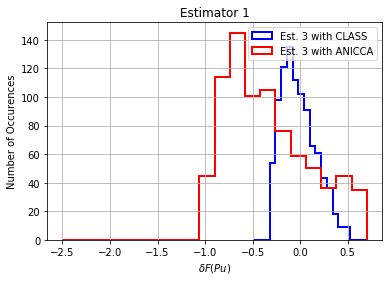

In [10]:
MPu_FLM_CLASS = (M_CLASS_FLM[:,5] - M_CLASS_FLM[:,6])/(PWR_CLASS_CT)
MPu_FF_CLASS = (M_CLASS_FF[:,5] - M_CLASS_FF[:,6])/(PWR_CLASS_CT)

est_3_CLASS = (MPu_FLM_CLASS - MPu_FF_CLASS)/(MPu_FF_CLASS)

MPu_FLM_ANICCA = (M_ANICCA_FLM_BOC[:,2] - M_ANICCA_FLM_EOC[:,2])/PWR_ANICCA_CT
MPu_FF_ANICCA = (M_ANICCA_FF_BOC[:,2] - M_ANICCA_FF_EOC[:,2])/PWR_ANICCA_CT

est_3_ANICCA = (MPu_FLM_ANICCA - MPu_FF_ANICCA)/(MPu_FF_ANICCA)

print(est_3_ANICCA[0], est_3_CLASS[0])

plt.figure(4)
plt.grid(True)
plt.title('Estimator 1')
plt.xlabel('$\delta F(Pu)$')
plt.ylabel('Number of Occurences')
plt.hist(est_3_CLASS,bins=20,range=(-0.5,0.7),histtype='step',lw=2,color='blue',label='Est. 3 with CLASS')
plt.hist(est_3_ANICCA,bins=20,range=(-2.5,0.7),histtype='step',lw=2,color='red',label='Est. 3 with ANICCA')
plt.legend(loc='upper right')